## Business Understanding 
Purpose: Ask relevant questions and define objectives for the problem that needs to be tackled

## Background
In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative.

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project. A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.

### Final Deliverables


* Well designed presentation for non-technical stakeholders outlining findings and recommendations, as well as future work (10min presentation).
* Jupyter notebook following Data Science Lifecycle

### Things to think about

* Try different (at least 3) machine learning algorithms to check which performs best on the problem at hand
* What would be right performance metric: Precision, recall, accuracy, F1 score, or something else? (Check TPR?)
* Check for data imbalance


## Key Question 

We currently hold a task by Kickstarter to come up with a model to predict in a first step whether is project is likely to be successful, given certain project parameters. In a second step (out of scope), Kickstarter would like to be able to provide a good goal recommendation for creators( for example using staff picks etc.)

* Given certain project parameters, __is a campaign likely to succeed or fail?__ --> classification
* what would e a __reasonable goal reccomendation for creators__ --> regression



## Feature Glossary

Features included in model

* Target : state
*
*
*

## Dataset Description

- **backers_count**: Amount of people who backed this project
- **category**: 
- **country**: Country the project owner lives in
- **created_at**: Date when the prjoect was created
- **currency**: Currency of the country where the owner lives in
- **currency_trailing_code**: 
- **current_currency**: 
- **deadline**: Date until the project can be backed
- **disable_communication**: If the communication with owner was disabled or not
- **fx_rate**: Foreign exchange rate
- **goal**: Project is only funded when the goal amount is reached
- **launched_at**: Date when the project was launced
- **spotlight**: Highlighted projects (available to all projects that are successfully funded)
- **staff_pick**: Promissing project picked by Kickstarter employees
- **state**: Project status
- **state_changed_at**: Date when state changed the last time
- **static_usd_rate**: static USD Convergen rate at time
- **usd_pledged**: pledge amount converted to USD using Static_usd_rate


## Dataset New/Added Feature Description

- **campaign_days**: Days the Project was live
- **pledged_over**: Amount Pledged surpassing the Goal(with converted pledge amount) 
- **pre_launched_days**: Days before the Project was launched


## Target Metric

* F1 score — Since creators wouldn’t want the model to predict too many success that will turn out to be a failure (minimize False Positives) and backers would want to make sure the model capture as many success as possible (minimize False Negatives), I want a balance between precision and recall

## Outcome / Reccomendations
*
*
*

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import scipy as sc
from scipy.stats import kstest
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

#Data mining
import os, glob

#Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import imblearn
from imblearn.over_sampling import RandomOverSampler





## Dashboard
Purpose : Define global variables and visuals

In [2]:
random_state = 100
test_size = 0.3
sns.set(style = "white")

## Data Mining

In [3]:
# # Import multiple Kickstarter csv files and merge into one dataframe

# path = "data-2"
# all_files = glob.glob(os.path.join(path, "*.csv"))

# all_df = []
# for f in all_files:
#     df = pd.read_csv(f, sep=',')
#     df['file'] = f.split('/')[-1]
#     all_df.append(df)
    
# merged_df = pd.concat(all_df, ignore_index=True, sort=True)

In [4]:

merged_df = pd.read_csv('data-2/Kickstarter_all.csv') ### brauche ich wenn ich den Anderen Kram nicht laufen lassen will

## Inspection and Data Cleaning

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  file                      209222 non-null  o

In [6]:
#save the merged data as .zip
#compression_opts = dict(method='zip', archive_name='out.csv')  
#merged_df.to_csv('out.zip', index=False, compression=compression_opts)

In [7]:
# Display shape of "data"
merged_df.shape

(209222, 38)

In [8]:
merged_df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,...,babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,...,the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,...,record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,...,the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,...,help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2820.000000,domestic


In [9]:
merged_df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'file', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [10]:
merged_df.groupby('state').count()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,profile,slug,source_url,spotlight,staff_pick,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
state,,,,,,,,,,,,,,,,,,,,,
canceled,8624,8618,8624,8624,8624,8624,8624,8624,8624,8624,...,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624
failed,75199,75197,75199,75199,75199,75199,75199,75199,75199,75199,...,75199,75199,75199,75199,75199,75199,75199,75199,75199,75199
live,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311,...,7311,7311,7311,7311,7311,7311,7311,7311,7311,6869
successful,117465,117465,117465,117465,117465,117465,117465,117465,117465,117465,...,117465,117465,117465,117465,117465,117465,117465,117465,117465,117427
suspended,623,623,623,623,623,623,623,623,623,623,...,623,623,623,623,623,623,623,623,623,623


In [11]:
pd.isnull(merged_df).sum()

backers_count                    0
blurb                            8
category                         0
converted_pledged_amount         0
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency                 0
deadline                         0
disable_communication            0
file                             0
friends                     208922
fx_rate                          0
goal                             0
id                               0
is_backing                  208922
is_starrable                     0
is_starred                  208922
launched_at                      0
location                       226
name                             0
permissions                 208922
photo                            0
pledged                          0
profile                          0
slug                

## Data Handling

In [12]:
# create a dataset for Inspection
final = merged_df.copy()

### Dropping Data

In [13]:
drop_list = []

#### Dropping features with missing values

In [14]:
drop_missing_values = ['blurb', 'friends', 'is_backing', 'is_starred', 'permissions', 'usd_type', 'location']
drop_list.extend(drop_missing_values)
final = final.drop(drop_missing_values, axis = 1)


#### Dropping useless features 

In [15]:
drop_useless_features = ['creator', 'currency_symbol', 'name', 'photo', 'profile', 'slug', 'source_url', 'urls', 'file']
drop_list.extend(drop_useless_features)
final = final.drop(drop_useless_features, axis = 1)

#### Dropping redundant features

In [16]:
drop_redundant_features = ['pledged', 'usd_pledged']
drop_list.extend(drop_redundant_features)
final = final.drop(drop_redundant_features, axis = 1)

In [17]:
drop_list

['blurb',
 'friends',
 'is_backing',
 'is_starred',
 'permissions',
 'usd_type',
 'location',
 'creator',
 'currency_symbol',
 'name',
 'photo',
 'profile',
 'slug',
 'source_url',
 'urls',
 'file',
 'pledged',
 'usd_pledged']

#### Replacing features

In [18]:
def clean_category(DataFrame): 
    cat_list = []
    subcat_list = []
    for e in DataFrame.category:
        string_list = e.split(',')
        if '/' in string_list[2]:
            cat_list.append(string_list[2].split('/')[0][8:])
            subcat_list.append(string_list[2].split('/')[1][:-1])
        else:
            cat_list.append(string_list[2][8:-1])
            subcat_list.append('None')
    DataFrame['category'] = cat_list
    DataFrame['sub_category'] = subcat_list
    return DataFrame

In [19]:
modified_list = ['category','state']

In [20]:
final = clean_category(final)

In [21]:
final.category.unique()

array(['fashion', 'games', 'music', 'publishing', 'theater', 'food',
       'art', 'photography', 'technology', 'dance', 'design',
       'film & video', 'crafts', 'comics', 'journalism'], dtype=object)

In [22]:
#replace successful and failed with 1 and 0
final.state.replace(['successful','failed'], [1,0],inplace=True)

#

final.is_starrable = final.is_starrable.astype(int)
final.disable_communication = final.disable_communication.astype(int)
final.currency_trailing_code = final.currency_trailing_code.astype(int)
final.staff_pick = final.staff_pick.astype(int)
final.spotlight = final.spotlight.astype(int)
#drop live,susspended,cancelled
#final = final[final['state'] == [1,0]]
final = final.query('state == [1,0]')
final.state = final.state.astype(int)

### Time conversions



In [23]:
modified_list.extend(['launched_at', 'deadline', 'created_at', 'state_changed_at'])         

In [24]:
#converting unix time 
final.launched_at = pd.to_datetime(final.launched_at,unit='s',infer_datetime_format=True)
final.deadline = pd.to_datetime(final.deadline,unit='s',infer_datetime_format=True)
final.created_at = pd.to_datetime(final.created_at,unit='s',infer_datetime_format=True)
final.state_changed_at = pd.to_datetime(final.state_changed_at,unit='s',infer_datetime_format=True)

### Writing df changes

In [25]:
feature_list = list(merged_df.columns)

df_features = pd.DataFrame(feature_list,columns =['features'])
df_features['dropped'] = df_features.features.isin(drop_list)
df_features['drop_reason'] = ['missing_values' if x in drop_missing_values \
                              else 'useless' if x in drop_useless_features \
                              else 'redundant' if x in drop_redundant_features \
                              else 'None' for x in df_features['features']]
df_features['modified'] = df_features.features.isin(modified_list)

In [26]:
df_features

,features,dropped,drop_reason,modified
0,backers_count,False,None,False
1,blurb,True,missing_values,False
2,category,False,None,True
3,converted_pledged_amount,False,None,False
4,country,False,None,False
5,created_at,False,None,True
6,creator,True,useless,False
7,currency,False,None,False
8,currency_symbol,True,useless,False
9,currency_trailing_code,False,None,False


# Data Exploration
Purpose: we gotta form a hypotheses / story about our defined problem by visually analyzing the data

In [27]:
#new dataset for exploration
data_exp = final.copy()

In [28]:
#years
#final['launched_at_yr'] = [date.year for date in final['launched_at']]

In [29]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 1 to 209221
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   backers_count             192664 non-null  int64         
 1   category                  192664 non-null  object        
 2   converted_pledged_amount  192664 non-null  int64         
 3   country                   192664 non-null  object        
 4   created_at                192664 non-null  datetime64[ns]
 5   currency                  192664 non-null  object        
 6   currency_trailing_code    192664 non-null  int64         
 7   current_currency          192664 non-null  object        
 8   deadline                  192664 non-null  datetime64[ns]
 9   disable_communication     192664 non-null  int64         
 10  fx_rate                   192664 non-null  float64       
 11  goal                      192664 non-null  float64       
 12  id

In [30]:
# Seperate continious vs. categorical variables
data_cat_col = ['category','country','sub_category','currency','current_currency','is_starrable','disable_communication','state']
data_cont_col = [x for x in final if x not in data_cat_col]
data_cat = final[data_cat_col]
data_cont = final[data_cont_col]

In [31]:
# Check if scaling is needed ( we can do this by looking at the .skew()
final.skew()

backers_count               41.997986
converted_pledged_amount    34.422017
currency_trailing_code      -1.671302
disable_communication        0.000000
fx_rate                     -2.244813
goal                        73.476994
id                          -0.002373
is_starrable                 0.000000
spotlight                   -0.449712
staff_pick                   2.137329
state                       -0.449712
static_usd_rate             -1.144525
dtype: float64

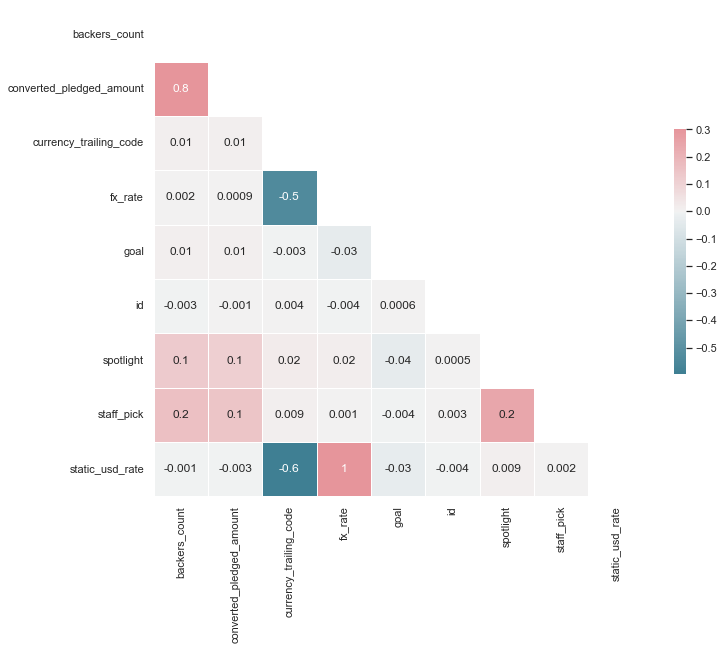

In [32]:
#Plot correlation heatmap for continious values
mask = np.triu(np.ones_like(data_cont.corr(), dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data_cont.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1g");


<AxesSubplot:>

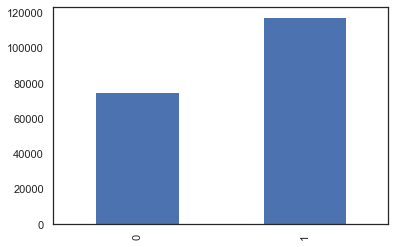

In [33]:
#Plot a histogram of our Target 'state' and see if it needs scaling for future work
data_exp['state'].value_counts(ascending=True).plot(kind='bar')

* imbalanced data!!

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='launched_at_yr', hue='state', data=data_exp);

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(x='category', hue='state', data=data_exp);

# Feature Engineering

In [35]:
new_features_list = ['pledged_over', 'campaign_days', 'pre_launched_days', 'launched_at_yr', 'goal_converted']

In [36]:
#create new features
final['pledged_over'] = final.converted_pledged_amount - final.goal 
final['campaign_days'] = ((final.deadline - final.launched_at)/ np.timedelta64(1, 'h')).astype(int)
final['pre_launched_days'] = ((final.launched_at - final.created_at)/ np.timedelta64(1, 'h')).astype(int)

final['launched_at_yr'] = [date.year for date in final['launched_at']]

final['goal_converted'] = final["goal"] * final["static_usd_rate"]
#use log on goal_converted



In [37]:
#use log on stuff
final['goal_converted_log'] = [math.log(el) for el in final['goal_converted']]
final['converted_pledged_amount_log'] = np.log(final['converted_pledged_amount'])
final['backers_count_log'] = np.log(final['backers_count'])

# Preprocessing (Train/Test Split and Basemodel)
In order to apply modelling on different dataset types, we should consider a nice way to do the splits.



In [38]:
#define predictors and target variable X,y
X = final.drop(["state"], axis=1)
y = final["state"]

In [39]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=test_size,
                                                        random_state=random_state,
                                                        shuffle=True,
                                                   stratify=y)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [40]:
# create a dummy classifier model as Basemodel
dum_clf = DummyClassifier(strategy='constant',constant=1).fit(X_train,y_train)
y_pred_dum_clf = dum_clf.predict(X_test)

print(confusion_matrix(y_test,y_pred_dum_clf))
print(classification_report(y_test,y_pred_dum_clf))


[[    0 22560]
 [    0 35240]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22560
           1       0.61      1.00      0.76     35240

    accuracy                           0.61     57800
   macro avg       0.30      0.50      0.38     57800
weighted avg       0.37      0.61      0.46     57800



In [41]:
#for future work
#scores = cross_val_score(dummy_clf, X_train, y_train, scoring='f1', cv=10, n_jobs=-1)

In [42]:
#use oversampling

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=random_state)
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(np.array(X_train), np.array(y_train))



In [ ]:
sum(y_train_over)

In [ ]:
len(y_train_over)

In [43]:
features_scalable_list = ['backers_count',
 'converted_pledged_amount',
 'goal', 'pledged_over', 'goal_converted']

In [ ]:
data_cont_col

In [44]:
X_train[features_scalable_list]

,backers_count,converted_pledged_amount,goal,pledged_over,goal_converted
207856,19,1110,1250.0,-140.0,1.002478e+03
179860,208,47049,25000.0,22049.0,2.500000e+04
36509,22,2560,10000.0,-7440.0,1.000000e+04
24237,8,288,30000.0,-29712.0,3.000000e+04
13252,0,0,50000.0,-50000.0,5.000000e+04
...,...,...,...,...,...
73518,61,3531,3000.0,531.0,3.000000e+03
77295,1,149,50000.0,-49851.0,4.420663e+04
113202,87,8006,6000.0,2006.0,7.392932e+03
87427,47,1891,22000.0,-20109.0,2.200000e+04


In [45]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [46]:
#use standard scaler on X_train and y_train
scaler = StandardScaler()
X_train_scaled[features_scalable_list] = scaler.fit_transform(np.array(X_train[features_scalable_list])) # Scaler is fitted to training data _only_
X_test_scaled[features_scalable_list] = scaler.transform(np.array(X_test[features_scalable_list])) # Already fitted scaler is applied to test data


#data_cat_col = ['category','country','sub_category','country','currency','current_currency','is_starrable','disable_communication']
#data_cont_col = [x for x in final if x not in data_cat_col]

In [ ]:
#use standard scaler on X_train_over and y_train_over

# Future Work

In [ ]:
# To do: save final df as csv
#compression_opts = dict(method='zip', archive_name='Kickstarter_all_clean.csv')  
#final.to_csv('Kickstarter_all_clean.zip', index=False, compression=compression_opts)

# Predictive Modelling
Purpose: Train machine learning models (supervised), evaluate their performance and use them to make predictions

* using f1 score as our metric

In [ ]:
#logistic regression

In [ ]:
#Random Forest Classifier

In [ ]:
#maybe AdaBoost

## Support Vector Machines (use classifier)

In [47]:
from sklearn import svm
from time import time
from sklearn.metrics import fbeta_score

### Functions

#### Train_predict

In [48]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F1-score on the the first 300 training samples
    results['f1_train'] = f1_score(y_train[:300], predictions_train)
        
    # TODO: Compute F1-score on the test set
    results['f1_test'] = f1_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    #
    print(confusion_matrix(y_test,predictions_test))
    print(classification_report(y_test,predictions_test))  
    
    # Return the results
    return results, learner

### Defining Model

In [66]:
clf = svm.SVC()
clf_10 = svm.SVC(C = 10)
# clf_linear_1 = svm.SVC(kernel = 'linear', C = 1)
# clf_linear_10 = svm.SVC(kernel = 'linear', C = 10)
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’

In [ ]:
features_used = [
 # 'backers_count', ### dependend on target
 # 'category',
 # 'converted_pledged_amount', ### dependend on target 
 # 'country',
 # 'created_at',
 # 'currency',
 # 'currency_trailing_code',
 # 'current_currency',
 # 'deadline',
 'disable_communication',
 # 'fx_rate',
 # 'goal',
 # 'id',
 'is_starrable',
 # 'launched_at',
 # 'spotlight', ### dependend on target
 'staff_pick',
 # 'state_changed_at',
 # 'static_usd_rate',
 # 'sub_category',
 # 'pledged_over', ### dependend on target
 'campaign_days',
 'pre_launched_days',
 # 'launched_at_yr',
 'goal_converted',
 # 'goal_converted_log',
 # 'converted_pledged_amount_log',
 # 'backers_count_log'
]

In [ ]:
features_used

In [ ]:
list(X_train[features_used].columns)

In [ ]:
sample_size = len(X_train)

In [ ]:
svm = train_predict(clf, sample_size, np.array(X_train[features_used]), np.array(y_train), np.array(X_test[features_used]), np.array(y_test))

In [ ]:
svm

In [ ]:
sample_size = 5000
svm, clf = train_predict(clf, sample_size, np.array(X_train_scaled[features_used]), np.array(y_train), np.array(X_test[features_used]), np.array(y_test))
svm

In [ ]:
sample_size = 5000
svm, clf_10 = train_predict(clf_10, sample_size, np.array(X_train[features_used]), np.array(y_train), np.array(X_test[features_used]), np.array(y_test))
svm

In [ ]:
sample_size = 5000
svm, clf_linear_1 = train_predict(clf_linear_1, sample_size, np.array(X_train[features_used]), np.array(y_train), np.array(X_test[features_used]), np.array(y_test))
svm

In [ ]:
sample_size = 5000
svm, clf_linear_10 = train_predict(clf_linear_10, sample_size, np.array(X_train[features_used]), np.array(y_train), np.array(X_test[features_used]), np.array(y_test))
svm

### permutation_importance

In [ ]:
from sklearn.inspection import permutation_importance


result = permutation_importance(
    clf, np.array(X_test[features_used]), np.array(y_test), n_repeats=5, random_state=42, n_jobs=2
)


In [ ]:
clf_importances = pd.Series(result.importances_mean, index=features_used)
clf_importances

### Changing Catigorical to Continous


 * Among the three classification methods, only Kernel Density Classification can handle the categorical variables in theory, while kNN and SVM are unable to be applied directly since they are based on the Euclidean distances
 * SVMs will handle both binary and continuous variables as long as you make some preprocessing: all features should be scaled or normalised. After that step, from the algorithms' perspective it doesn't matter if features are continuous or binary: for binaries, it sees samples that are either "far" away, or very similar; for continuous there are also the in between values. Kernel doesn't matter in respect to the type of variables.

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [50]:
X.columns

Index(['backers_count', 'category', 'converted_pledged_amount', 'country',
       'created_at', 'currency', 'currency_trailing_code', 'current_currency',
       'deadline', 'disable_communication', 'fx_rate', 'goal', 'id',
       'is_starrable', 'launched_at', 'spotlight', 'staff_pick',
       'state_changed_at', 'static_usd_rate', 'sub_category', 'pledged_over',
       'campaign_days', 'pre_launched_days', 'launched_at_yr',
       'goal_converted', 'goal_converted_log', 'converted_pledged_amount_log',
       'backers_count_log'],
      dtype='object')

In [51]:
data_cat_col

['category',
 'country',
 'sub_category',
 'currency',
 'current_currency',
 'is_starrable',
 'disable_communication',
 'state']

In [52]:
categorical = data_cat_col.copy()
categorical.remove('state')
categorical.remove('is_starrable')
categorical.remove('disable_communication')
categorical

['category', 'country', 'sub_category', 'currency', 'current_currency']

In [53]:
a = X[categorical]
a

,category,country,sub_category,currency,current_currency
1,games,US,playing cards,USD,USD
2,music,US,rock,USD,USD
3,games,GB,playing cards,GBP,USD
4,publishing,US,nonfiction,USD,USD
5,music,US,classical music,USD,USD
...,...,...,...,...,...
209217,games,US,tabletop games,USD,USD
209218,music,NL,electronic music,EUR,USD
209219,technology,US,hardware,USD,USD
209220,film & video,US,festivals,USD,USD


In [54]:
le = preprocessing.LabelEncoder()
catvar_df = a[categorical]
X_2 = catvar_df.apply(le.fit_transform)
X_2.head()

,category,country,sub_category,currency,current_currency
1,8,21,95,13,1
2,10,21,113,13,1
3,8,9,95,5,1
4,12,21,85,13,1
5,10,21,23,13,1


In [55]:
X_2 = X_2.drop(['sub_category'], axis=1)
X_2 = X_2.drop(['current_currency'], axis=1)
X_2

,category,country,currency
1,8,21,13
2,10,21,13
3,8,9,5
4,12,21,13
5,10,21,13
...,...,...,...
209217,8,21,13
209218,10,16,4
209219,13,21,13
209220,6,21,13


In [56]:
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder(drop = 'first')

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape

(192664, 48)

In [57]:
df_onehotlabels = pd.DataFrame(onehotlabels)
df_onehotlabels

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
192660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
192662,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
X_hot = X.copy()
X_hot = X_hot[['goal',
               'disable_communication',
 'is_starrable',
 'staff_pick',
 'campaign_days',
 'pre_launched_days']]
X_hot = X_hot.reset_index()
X_hot = X_hot.drop('index', axis=1)
X_hot

,goal,disable_communication,is_starrable,staff_pick,campaign_days,pre_launched_days
0,1000.0,0,0,0,720,194
1,15000.0,0,0,0,720,5398
2,10000.0,0,0,0,1439,129
3,2800.0,0,0,0,720,98
4,3500.0,0,0,0,720,3824
...,...,...,...,...,...,...
192659,1500.0,0,0,0,342,19
192660,5000.0,0,0,0,868,483
192661,2500.0,0,0,0,799,1009
192662,5500.0,0,0,0,720,468


In [59]:
B = X_hot.join(df_onehotlabels,how='left')
B

,goal,disable_communication,is_starrable,staff_pick,campaign_days,pre_launched_days,0,1,2,3,...,38,39,40,41,42,43,44,45,46,47
0,1000.0,0,0,0,720,194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,15000.0,0,0,0,720,5398,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10000.0,0,0,0,1439,129,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2800.0,0,0,0,720,98,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3500.0,0,0,0,720,3824,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192659,1500.0,0,0,0,342,19,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
192660,5000.0,0,0,0,868,483,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192661,2500.0,0,0,0,799,1009,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
192662,5500.0,0,0,0,720,468,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
X_hot = B.copy()
y = final["state"]

In [61]:
count = X_hot.isna().sum()
count

goal                     0
disable_communication    0
is_starrable             0
staff_pick               0
campaign_days            0
pre_launched_days        0
0                        0
1                        0
2                        0
3                        0
4                        0
5                        0
6                        0
7                        0
8                        0
9                        0
10                       0
11                       0
12                       0
13                       0
14                       0
15                       0
16                       0
17                       0
18                       0
19                       0
20                       0
21                       0
22                       0
23                       0
24                       0
25                       0
26                       0
27                       0
28                       0
29                       0
30                       0
3

In [62]:
#Split data into training and testing sets
X_hot_train, X_hot_test, y_train, y_test= train_test_split(X_hot,y,test_size=test_size,
                                                        random_state=random_state,
                                                        shuffle=True,
                                                   stratify=y)

In [63]:
X_hot_train_scaled = X_hot_train.copy()
X_hot_test_scaled = X_hot_test.copy()

In [64]:
#use standard scaler on X_train and y_train
scaler = StandardScaler()
X_hot_train_scaled = scaler.fit_transform(np.array(X_hot_train)) # Scaler is fitted to training data _only_
X_hot_test_scaled = scaler.transform(np.array(X_hot_test)) # Already fitted scaler is applied to test data

X_hot_train_scaled
X_hot_test_scaled

array([[-0.03637577,  0.        ,  0.        , ..., -0.08187303,
        -0.05701609,  0.63081776],
       [-0.03383368,  0.        ,  0.        , ..., -0.08187303,
        -0.05701609,  0.63081776],
       [-0.03764681,  0.        ,  0.        , ..., -0.08187303,
        -0.05701609,  0.63081776],
       ...,
       [ 0.02421056,  0.        ,  0.        , ..., -0.08187303,
        -0.05701609, -1.58524389],
       [ 0.63854745,  0.        ,  0.        , ..., -0.08187303,
        -0.05701609, -1.58524389],
       [-0.00798916,  0.        ,  0.        , ..., -0.08187303,
        -0.05701609, -1.58524389]])

In [67]:
sample_size =5000
svm, clf = train_predict(clf, sample_size, X_hot_train, np.array(y_train), X_hot_test, np.array(y_test))
svm

SVC trained on 5000 samples.
[[ 1322 21238]
 [  361 34879]]
              precision    recall  f1-score   support

           0       0.79      0.06      0.11     22560
           1       0.62      0.99      0.76     35240

    accuracy                           0.63     57800
   macro avg       0.70      0.52      0.44     57800
weighted avg       0.69      0.63      0.51     57800



{'train_time': 0.7468430995941162,
 'pred_time': 17.446062803268433,
 'acc_train': 0.61,
 'acc_test': 0.6263148788927335,
 'f1_train': 0.7494646680942184,
 'f1_test': 0.76357586172926,
 'f_train': 0.6529850746268656,
 'f_test': 0.6715041508155313}

In [68]:
sample_size =5000
svm, clf = train_predict(clf, sample_size, X_hot_train_scaled, np.array(y_train), X_hot_test_scaled, np.array(y_test))
svm

SVC trained on 5000 samples.
[[ 8801 13759]
 [ 5193 30047]]
              precision    recall  f1-score   support

           0       0.63      0.39      0.48     22560
           1       0.69      0.85      0.76     35240

    accuracy                           0.67     57800
   macro avg       0.66      0.62      0.62     57800
weighted avg       0.66      0.67      0.65     57800



{'train_time': 0.6244099140167236,
 'pred_time': 16.156712770462036,
 'acc_train': 0.69,
 'acc_test': 0.6721107266435986,
 'f1_train': 0.768079800498753,
 'f1_test': 0.7602408724034108,
 'f_train': 0.7156133828996282,
 'f_test': 0.7138275429527141}

In [69]:
sample_size = len(X_hot_train_scaled)
svm, clf = train_predict(clf, sample_size, X_hot_train_scaled, np.array(y_train), X_hot_test_scaled, np.array(y_test))
svm

SVC trained on 134864 samples.
[[10138 12422]
 [ 5267 29973]]
              precision    recall  f1-score   support

           0       0.66      0.45      0.53     22560
           1       0.71      0.85      0.77     35240

    accuracy                           0.69     57800
   macro avg       0.68      0.65      0.65     57800
weighted avg       0.69      0.69      0.68     57800



{'train_time': 1228.603945016861,
 'pred_time': 446.49273204803467,
 'acc_train': 0.6933333333333334,
 'acc_test': 0.693961937716263,
 'f1_train': 0.7653061224489796,
 'f1_test': 0.772151735686224,
 'f_train': 0.7211538461538461,
 'f_test': 0.7316912410897373}

# Ensemble Methods

In [ ]:
#use KNN,SVC,DTC,Randomforestclassifier,XGB....

# Future Work

In [ ]:
#use maybe RandomizedSearchCV on RandomForest or any given Algorithm

# Data Visualisation
Purpose: Communicate the findings with stakeholders using plots and interactive visualisations

# Findings 
Purpose: Summarize the key results and findings